## 载入必要的库

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re

In [2]:
from sklearn import preprocessing

In [3]:
%matplotlib inline

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 初识数据

In [6]:
titanic_train = pd.read_csv('../data/train.csv',encoding= 'gb18030')
titanic_test = pd.read_csv('../data/test.csv',encoding = 'gb18030')

In [7]:
print("训练数据的维度是：{}".format(titanic_train.shape))
print("测试数据的维度是：{}".format(titanic_test.shape))

训练数据的维度是：(891, 12)
测试数据的维度是：(418, 11)


In [8]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

PassengerId -- 顾客ID（连续型）  【没用】  
Survived -- y  
Pclass -- 舱等1,2,3（类别型）  
Name -- 客户名称（文字型）  
Sex -- 性别（类别型）  
Age -- 年龄（连续型）   
SibSp -- 在船上的兄弟姐妹和配偶个数（连续型）  
Parch -- 在船上的父母、儿女个数（连续型）  
Ticket -- 票号（类别型）    
Fare -- 票价（连续型）  
Cabin -- 舱室（类别型）    
Embarked -- 上船的码头 （类别型）   

In [9]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


小结
+ 数据量大小；
+ 数据维度高低；
+ 类别型变量、数值型变量区分开
+ 基本数据分布
+ 变量的取值范围
+ 缺失值情况

## 探索性数据分析
+ 回归问题用相关系数矩阵（热力图）做
+ 分类问题用和y的关系做

### 单变量分析    
#### 因变量

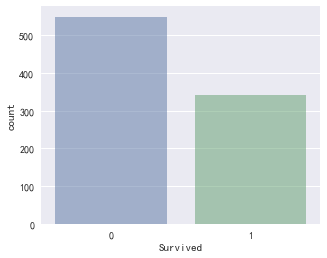

In [12]:
fig = plt.figure(figsize = (5,4))
ax1 = fig.add_subplot()
sns.countplot(x="Survived", data=titanic_train,alpha = 0.5,ax = ax1)

#### 类别型变量
Pclass 、 Name 、 Sex 、 Ticket 、 Cabin 、 Embarked

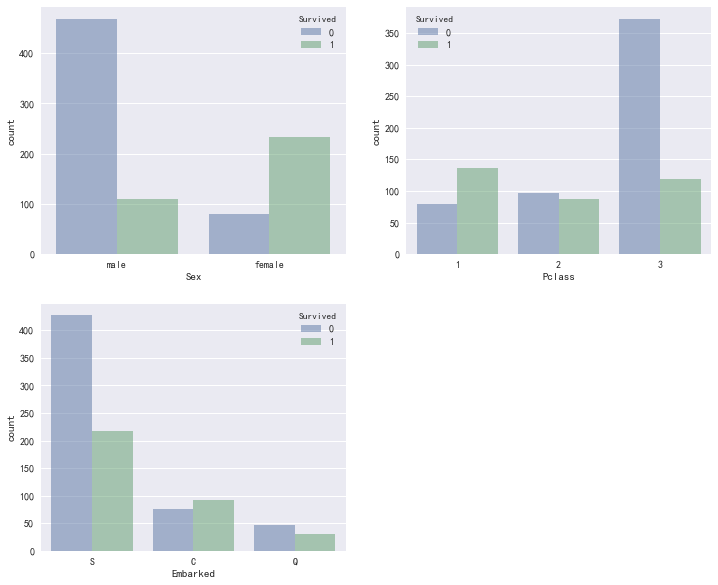

In [13]:
# 缺失值不多 & 类别较少
fig = plt.figure(figsize = (12,10))
ax1 = fig.add_subplot(221)
sns.countplot(x="Sex", hue="Survived", data=titanic_train,alpha = 0.5, ax = ax1)
ax2 = fig.add_subplot(222)
sns.countplot(x="Pclass", hue="Survived", data=titanic_train,alpha = 0.5,ax = ax2)
ax3 = fig.add_subplot(223)
sns.countplot(x="Embarked", hue="Survived", data=titanic_train,alpha = 0.5,ax = ax3)  

In [14]:
# 缺失值较多 or 类别过多
titanic_train.Cabin.unique().shape

(148,)

缺失值处理

缺值比例极高，舍弃。若作为特征加入，可能反倒带入noise；  
缺值比例适中 & 类别变量，把NaN作为一个新类别，加入特征中；  
缺失比例适中 & 数值型，离散化，再把NaN作为一个类别加到特征中  
缺失比例很小，填充。  

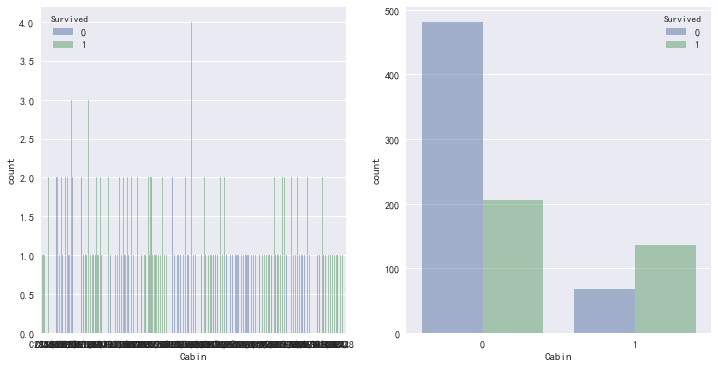

In [15]:
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(121)
sns.countplot(x="Cabin", hue="Survived", data=titanic_train,alpha = 0.5, ax = ax1)

Cabin_notnull = titanic_train['Cabin'].notnull().astype(int)
ax2 = fig.add_subplot(122)
sns.countplot(x = Cabin_notnull, hue=titanic_train['Survived'], alpha = 0.5, ax = ax2)

#### 连续型变量
Age,SibSp,Parch,Fare

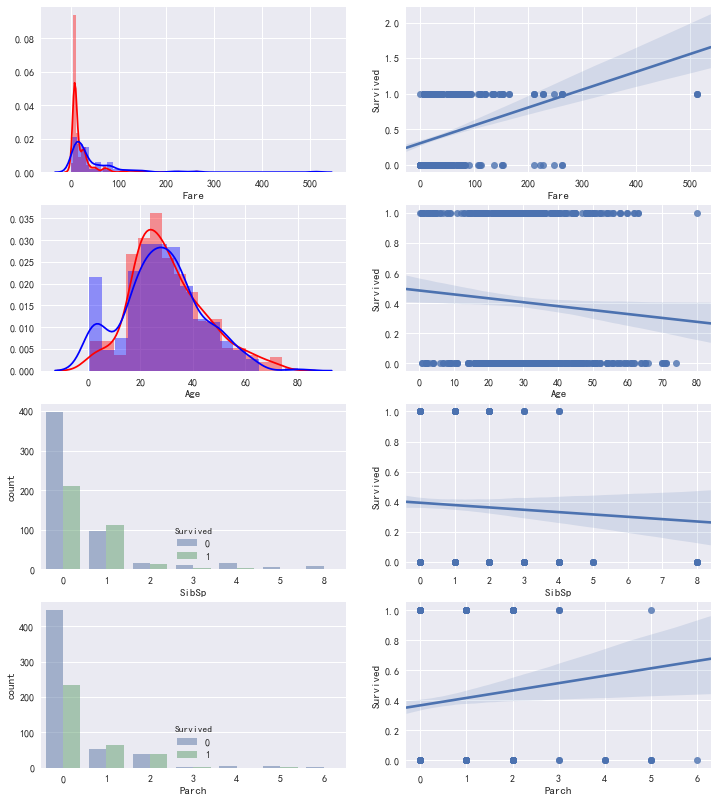

In [17]:
fig = plt.figure(figsize = (12,14))

ax1 = fig.add_subplot(421)
nosurvived = titanic_train.Fare[titanic_train.Survived == 0]
survived= titanic_train.Fare[titanic_train.Survived == 1]
sns.distplot(nosurvived,ax = ax1,color = 'r')
sns.distplot(survived,ax = ax1,color = "b")

ax2 = fig.add_subplot(422)
sns.regplot(x="Fare", y="Survived", data=titanic_train)

ax3 = fig.add_subplot(423)
nosurvived2 = titanic_train.Age[titanic_train.Age.notnull()][titanic_train.Survived == 0]
survived2 = titanic_train.Age[titanic_train.Age.notnull()][titanic_train.Survived == 1]
sns.distplot(nosurvived2,ax = ax3,color = 'r')
sns.distplot(survived2,ax = ax3,color = "b")

ax4 = fig.add_subplot(424)
sns.regplot(x="Age", y="Survived", data=titanic_train)

ax5 = fig.add_subplot(425)
sns.countplot(x = 'SibSp', hue='Survived',data = titanic_train, alpha = 0.5, ax = ax5)

ax6 = fig.add_subplot(426)
sns.regplot(x="SibSp", y="Survived", data=titanic_train)

ax7 = fig.add_subplot(427)
sns.countplot(x = 'Parch', hue='Survived',data = titanic_train, alpha = 0.5, ax = ax7)

ax8 = fig.add_subplot(428)
sns.regplot(x="Parch", y="Survived", data=titanic_train)

## 4.3 暂时不用的特征
Name、Ticket

## 特征工程
考虑的特征：Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked  
直接用的特征：SibSp,Parch,Fare  
暂时不用的特征：Name，Ticket  
需要加工的特征：
+ Pclass、Sex             (onehot编码)  
+ Age、Embarked            (填充缺失值)  
+ Cabin                 (缺失值过多，增加一个表明NA的类别变量)             

In [325]:
# 合并训练集和测试集
ntrain = titanic_train.shape[0]
ntest = titanic_test.shape[0]
y_train = titanic_train.Survived.values
all_data = pd.concat((titanic_train, titanic_test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("合并训练集和测试集后，数据集的维度是 : {}".format(all_data.shape))

合并训练集和测试集后，数据集的维度是 : (1309, 11)


#### Pclass
+ 随着舱等的下降，生存概率越低，具有负相关关系
+ 1、读热编码 Pclass_1,Pclass_2,Pclass_3
+ 2、123的编码也有一定意义

In [326]:
Pclass = pd.get_dummies(all_data['Pclass'])
Pclass.columns = ['Pclass_1', 'Pclass_2', 'Pclass_3']

In [292]:
Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [327]:
all_data = pd.concat([all_data, Pclass], axis=1) # 将独热编码生成的3列特征加入原数据集
all_data.head(4)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,113803,1,0,0


#### Sex
+ 女性的生存概率高于男性
+ 1、二值编码 女性1，男性0
+ 2、读热编码 Age_1,Age_2 

In [328]:
Sex = all_data['Sex']
all_data.loc[Sex == 'male','Sex'] = 0
all_data.loc[Sex == 'female','Sex'] = 1
all_data[["Sex"]].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [329]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,A/5 21171,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,PC 17599,1,0,0
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,STON/O2. 3101282,0,0,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,113803,1,0,0
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,373450,0,0,1


#### Cabin
+ 缺失比例较高，缺失值少的人生存概率较高
+ 1、Cabin根据是否缺失编码

In [330]:
all_data['Cabin_notnull'] = all_data['Cabin'].notnull().astype(int)
all_data['Cabin_notnull'].unique() # 0、1编码

array([0, 1], dtype=int64)

In [331]:
all_data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3,Cabin_notnull
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,A/5 21171,0,0,1,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,PC 17599,1,0,0,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,STON/O2. 3101282,0,0,1,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,113803,1,0,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,373450,0,0,1,0


#### Age
+ 含较少的缺失值
+ 1、连续变量采用中位数填充

In [332]:
all_data["Age"] = all_data["Age"].fillna(all_data["Age"].median())

In [333]:
all_data["Age"].isnull().sum().sum() # 确保没有缺失值

0

#### Embarked
+ 含较少的缺失值 
+ 1、类别型变量采用众数填充  
+ 2、填充以后采用one-hot编码

In [334]:
all_data["Embarked"] = all_data["Embarked"].fillna(all_data["Embarked"].mode()[0])  # 用众数填充

In [335]:
all_data["Embarked"].isnull().sum().sum() # 确保没有缺失值

0

In [336]:
all_data['Embarked'].unique() # 变量的查看类别

array(['S', 'C', 'Q'], dtype=object)

In [337]:
Embarked = pd.get_dummies(all_data['Embarked'])
Embarked.columns = ['Embarked_S', 'Embarked_Q', 'Embarked_C']

In [364]:
all_data = pd.concat([all_data,Embarked],axis = 1)
train.Sex = train.Sex.astype(int)
all_data.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_C,Family_size,Name_len,Age_Adult,Age_Child,Age_Elder,Title,Embarked_S,Embarked_Q,Embarked_C
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,1,23,1,0,0,1.0,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,51,1,0,0,3.0,1,0,0


In [339]:
# 取出要建模的变量
raw_predictors = [
    'Age',
    'Fare',
    'Parch',
    'SibSp',
    'Sex',
    'Pclass_1',
    'Pclass_2',
    'Pclass_3',
    'Cabin_notnull',
    'Embarked_C',
    'Embarked_Q',
    'Embarked_S'
]

In [170]:
# 分开训练集和测试集
train = all_data[:ntrain]
test = all_data[ntrain:]

## 建模

In [243]:
from sklearn.linear_model import  LinearRegression,ElasticNet, Lasso, Ridge,BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [195]:
# 将以上步骤写为函数
def modelfit(alg, dtrain, y, predictor, performCV=True, printFeatureImportance=True, cv_folds=5):
    # 训练模型
    alg.fit(dtrain[predictor], y)

    if performCV:
    # 交叉验证评分
        cv_score = cross_val_score(alg, dtrain[predictor], y, cv=cv_folds, scoring='neg_mean_squared_error')
    
    # 输出交叉验证结果
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

    # 输出特征重要性评分
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictor).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

#### 逻辑回归

In [204]:
logist = LinearRegression()
modelfit(logist,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=False)

CV Score : Mean - -0.1466884 | Std - 0.01370995 | Min - -0.1636489 | Max - -0.1238445


In [206]:
logist.coef_

array([ -5.64708610e-03,   3.49484764e-04,  -1.98572812e-02,
        -3.97332673e-02,   4.96876335e-01,   7.67847181e-02,
         5.28705571e-02,  -1.29655275e-01,   1.62412799e-01,
        -4.50911730e-02,   1.77185456e-02,   2.73726273e-02])

In [233]:
# 展示特征名和系数估计值
pd.concat([Series(train[raw_predictors].columns),Series(logist.coef_)],axis = 1)

,0,1
0,Age,-0.005647
1,Fare,0.000349
2,Parch,-0.019857
3,SibSp,-0.039733
4,Sex,0.496876
5,Pclass_1,0.076785
6,Pclass_2,0.052871
7,Pclass_3,-0.129655
8,Cabin_notnull,0.162413
9,Embarked_C,-0.045091


#### lasso模型

In [197]:
lasso = Lasso(alpha =0.0005, random_state=1)
modelfit(lasso,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=False)

CV Score : Mean - -0.1465243 | Std - 0.01359891 | Min - -0.1632976 | Max - -0.1237601


In [201]:
lasso.coef_

array([ -5.60355058e-03,   3.75571396e-04,  -1.90470600e-02,
        -3.97030976e-02,   4.94692898e-01,   2.19631089e-02,
        -0.00000000e+00,  -1.81431949e-01,   1.60818166e-01,
        -6.20665694e-02,  -0.00000000e+00,   7.56276214e-03])

In [200]:
np.sum(lasso.coef_ != 0) # 返回选择留下的特征个数

10

In [234]:
# 展示特征名和系数估计值
pd.concat([Series(train[raw_predictors].columns),Series(lasso.coef_)],axis = 1)

,0,1
0,Age,-0.005604
1,Fare,0.000376
2,Parch,-0.019047
3,SibSp,-0.039703
4,Sex,0.494693
5,Pclass_1,0.021963
6,Pclass_2,-0.000000
7,Pclass_3,-0.181432
8,Cabin_notnull,0.160818
9,Embarked_C,-0.062067


#### 岭回归

In [244]:
r = Ridge()
modelfit(r,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=False)

CV Score : Mean - -0.1466487 | Std - 0.01365297 | Min - -0.1634944 | Max - -0.1238263


In [245]:
r.coef_

array([ -5.64660554e-03,   3.56387467e-04,  -1.95063633e-02,
        -3.97411240e-02,   4.94314570e-01,   7.70583743e-02,
         5.26347174e-02,  -1.29693092e-01,   1.61097254e-01,
        -4.51189553e-02,   1.77691999e-02,   2.73497553e-02])

In [246]:
# 展示特征名和系数估计值
pd.concat([Series(train[raw_predictors].columns),Series(r.coef_)],axis = 1)

,0,1
0,Age,-0.005647
1,Fare,0.000356
2,Parch,-0.019506
3,SibSp,-0.039741
4,Sex,0.494315
5,Pclass_1,0.077058
6,Pclass_2,0.052635
7,Pclass_3,-0.129693
8,Cabin_notnull,0.161097
9,Embarked_C,-0.045119


#### 弹性网络模型

In [238]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
modelfit(ENet,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=False)

CV Score : Mean - -0.1465382 | Std - 0.01360742 | Min - -0.1633273 | Max - -0.1237673


In [239]:
ENet.coef_

array([ -5.60796694e-03,   3.73161759e-04,  -1.91117431e-02,
        -3.97070372e-02,   4.94802516e-01,   2.22462801e-02,
         0.00000000e+00,  -1.81500179e-01,   1.60890819e-01,
        -6.21144745e-02,   0.00000000e+00,   7.79628880e-03])

In [240]:
# 展示特征名和系数估计值
pd.concat([Series(train[raw_predictors].columns),Series(ENet.coef_)],axis = 1)

,0,1
0,Age,-0.005608
1,Fare,0.000373
2,Parch,-0.019112
3,SibSp,-0.039707
4,Sex,0.494803
5,Pclass_1,0.022246
6,Pclass_2,0.000000
7,Pclass_3,-0.181500
8,Cabin_notnull,0.160891
9,Embarked_C,-0.062114


#### Kernel Ridge Regression
+ 涉及到核就没有系数了

In [250]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
modelfit(KRR,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=False)

CV Score : Mean - -0.1372025 | Std - 0.02132236 | Min - -0.1632864 | Max - -0.1023793


#### 随机森林

CV Score : Mean - -0.1533802 | Std - 0.02216434 | Min - -0.1771247 | Max - -0.1161745


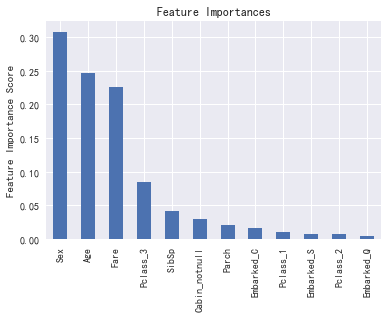

In [253]:
rf0 = RandomForestRegressor(random_state=1234)
modelfit(rf0,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=True)

#### Gradient Boosting Regression

CV Score : Mean - -0.1456037 | Std - 0.02363924 | Min - -0.1723226 | Max - -0.1170867


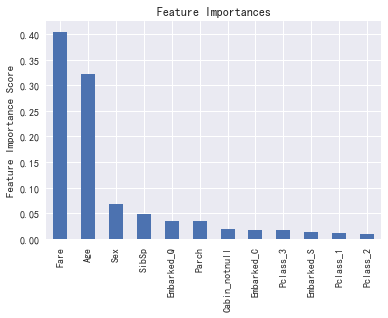

In [255]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
modelfit(GBoost,train[raw_predictors],y_train,raw_predictors,printFeatureImportance=True)

#### XGBoost

CV Score : Mean - -0.133479 | Std - 0.01773137 | Min - -0.15813 | Max - -0.112031


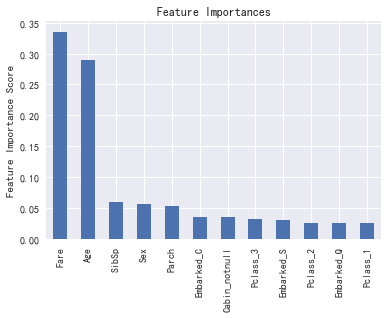

In [365]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
modelfit(model_xgb,train[raw_predictors],y_train,raw_predictors)

#### LightGBM

CV Score : Mean - -0.1355879 | Std - 0.01608347 | Min - -0.1538115 | Max - -0.1113005


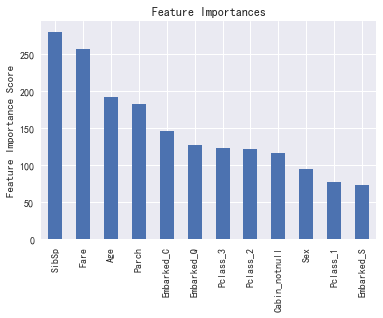

In [363]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
modelfit(model_lgb,train[raw_predictors],y_train,raw_predictors)

## 进一步特征工程
考虑增加以下几个特征： 
家庭成员个数：Family_size，SibSp 和 Parch 之和  
姓名的长度：Name_len  
根据年龄段进行编码：Age_Child ， Age_Teenager ， Age_Youth ， Age_Middleaged ， Age_Lesselder ， Age_Elder  
头衔：Title  

In [340]:
all_data.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Ticket,Pclass_1,Pclass_2,Pclass_3,Cabin_notnull,Embarked_S,Embarked_Q,Embarked_C
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,A/5 21171,0,0,1,0,0,0,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,PC 17599,1,0,0,1,1,0,0


#### Family_size

In [341]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch']

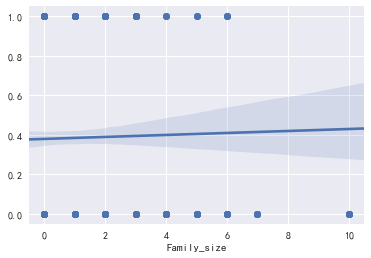

In [342]:
sns.regplot(x='Family_size', y=y_train, data=all_data[:ntrain]); # Family_size对生存率的影响似乎是中性的，但是先暂时放进模型中

#### Name_len

In [343]:
all_data['Name_len'] = all_data['Name'].map(len)

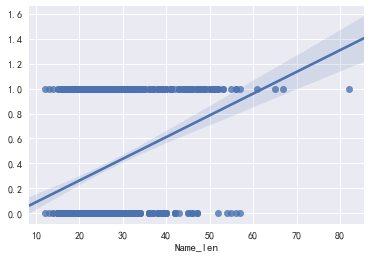

In [320]:
sns.regplot(x = 'Name_len', y = y_train, data=all_data[:ntrain]); # Name的长度和生存率似乎正相关

#### 根据年龄段进行编码
Age_Child ， Age_Teenager ， Age_Youth ， Age_Middleaged ， Age_Lesselder ， Age_Elder

In [344]:
bins = [0, 12, 60, 100]
group_names = ['Age_Child', 'Age_Adult', 'Age_Elder']
age_cut = pd.get_dummies(pd.cut(all_data.Age, bins, labels=group_names)).astype(int)

In [345]:
all_data = pd.concat([all_data, age_cut], axis=1)
all_data.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_3,Cabin_notnull,Embarked_S,Embarked_Q,Embarked_C,Family_size,Name_len,Age_Adult,Age_Child,Age_Elder
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,0,0,0,1,1,23,1,0,0


#### Title

In [348]:
import re

# 从姓名特征中获取头衔的函数
def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# 生成头衔序列
titles = all_data["Name"].map(get_title)

In [349]:
# 统计每种头衔出现的次数
DataFrame(pd.value_counts(titles)).T

,Mr,Miss,Mrs,Master,Rev,Dr,Col,Mlle,Ms,Major,Mme,Lady,Capt,Sir,Don,Dona,Jonkheer,Countess
Name,757,260,197,61,8,8,4,2,2,2,1,1,1,1,1,1,1,1


In [352]:
# 分别为每种头衔进行编码，将出现频率较少、含义相近的头衔进行合并
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8,
                 "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

# 建立Title特征，对应每位乘客的头衔
all_data['Title'] = titles.map(title_mapping)
all_data.head(1)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Cabin_notnull,Embarked_S,Embarked_Q,Embarked_C,Family_size,Name_len,Age_Adult,Age_Child,Age_Elder,Title
0,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,1,1,23,1,0,0,1.0


#### 生成交叉的类别变量
Cabin_notnull、Embarked、Pclass、Sex、Age_Adult、Age_Children、Age_Elder

In [368]:
all_data["Cabin_notnull"]

0       0
1       1
2       0
3       1
4       0
5       0
6       1
7       0
8       0
9       0
10      1
11      1
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      1
24      0
25      0
26      0
27      1
28      0
29      0
       ..
1279    0
1280    0
1281    1
1282    1
1283    0
1284    0
1285    0
1286    1
1287    0
1288    1
1289    0
1290    0
1291    1
1292    0
1293    0
1294    0
1295    1
1296    1
1297    0
1298    1
1299    0
1300    0
1301    0
1302    1
1303    0
1304    0
1305    1
1306    0
1307    0
1308    0
Name: Cabin_notnull, Length: 1309, dtype: int32